In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Importing train and test Dataset
train = pd.read_csv("cosmicclassifierTraining.csv")
test = pd.read_csv("cosmicTest.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Atmospheric Density            57016 non-null  float64
 1   Surface Temperature            56968 non-null  float64
 2   Gravity                        57016 non-null  float64
 3   Water Content                  56923 non-null  float64
 4   Mineral Abundance              57079 non-null  float64
 5   Orbital Period                 57003 non-null  float64
 6   Proximity to Star              57055 non-null  float64
 7   Magnetic Field Strength        56942 non-null  object 
 8   Radiation Levels               56979 non-null  object 
 9   Atmospheric Composition Index  57058 non-null  float64
 10  Prediction                     56961 non-null  float64
dtypes: float64(9), object(2)
memory usage: 5.0+ MB


In [4]:
# Displaying the head of the Dataset
train.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,NaN,Category_6,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,Category_9,Category_9,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,NaN,Category_8,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,NaN,Category_11,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,Category_6,Category_10,0.407941,9.0


In [5]:
train.describe()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index,Prediction
count,57016.000000,56968.000000,57016.000000,56923.000000,57079.000000,57003.000000,57055.000000,57058.000000,56961.000000
mean,-0.000202,-0.000288,-0.000469,0.001938,-0.000730,-0.001043,0.000188,0.000211,4.454381
std,2.263527,1.936598,1.804605,1.689267,1.605524,1.511685,1.316682,1.120303,2.890055
min,-4.364843,-5.503527,-5.553877,-5.816755,-5.077363,-4.801046,-4.537187,-4.007504,0.000000
25%,-1.555810,-1.426786,-1.279002,-1.218870,-1.078449,-1.048920,-0.937097,-0.709852,2.000000
50%,-0.188670,-0.330037,0.046231,-0.004676,0.040008,0.036651,-0.062001,0.049292,4.000000
75%,1.308113,1.503646,1.255432,1.063391,1.095483,1.058800,0.888149,0.789511,7.000000
max,9.324018,5.638094,6.030290,6.287045,5.584059,5.111014,4.942699,3.852567,9.000000


In [6]:
# To know number of Null values in each Columns and we infer that there are lot of null values we need to 
# handle before giving it to the model
train.isnull().sum()

Atmospheric Density              2984
Surface Temperature              3032
Gravity                          2984
Water Content                    3077
Mineral Abundance                2921
Orbital Period                   2997
Proximity to Star                2945
Magnetic Field Strength          3058
Radiation Levels                 3021
Atmospheric Composition Index    2942
Prediction                       3039
dtype: int64

In [7]:
print(train.columns)

Index(['Atmospheric Density', 'Surface Temperature', 'Gravity',
       'Water Content', 'Mineral Abundance', 'Orbital Period',
       'Proximity to Star', 'Magnetic Field Strength', 'Radiation Levels',
       'Atmospheric Composition Index', 'Prediction'],
      dtype='object')


In [8]:
# Making list of all features that are numerical to fill the null values with the Mediam values
numerical_columns = ['Atmospheric Density', 'Surface Temperature', 'Gravity',
       'Water Content', 'Mineral Abundance', 'Orbital Period',
       'Proximity to Star','Atmospheric Composition Index']

In [9]:
#Filling null values with the Median values
train[numerical_columns] = train[numerical_columns].apply(lambda x: x.fillna(x.median()))

In [10]:
# After filling the Null values of Numerical Columns.
train.isnull().sum()

Atmospheric Density                 0
Surface Temperature                 0
Gravity                             0
Water Content                       0
Mineral Abundance                   0
Orbital Period                      0
Proximity to Star                   0
Magnetic Field Strength          3058
Radiation Levels                 3021
Atmospheric Composition Index       0
Prediction                       3039
dtype: int64

In [11]:
categorical_columns = ['Magnetic Field Strength', 'Radiation Levels']

In [12]:
for col in categorical_columns:
    # Extract numbers from the categorical column in both train and test
    train[col] = train[col].astype(str).str.extract(r'(\d+)')  # Extract number
    test[col] = test[col].astype(str).str.extract(r'(\d+)')    # Extract number
    
    # Convert to numeric (float), keeping NaN for non-numeric cases
    train[col] = pd.to_numeric(train[col], errors='coerce')
    test[col] = pd.to_numeric(test[col], errors='coerce')


In [13]:
train.isnull().sum()

Atmospheric Density                 0
Surface Temperature                 0
Gravity                             0
Water Content                       0
Mineral Abundance                   0
Orbital Period                      0
Proximity to Star                   0
Magnetic Field Strength          3058
Radiation Levels                 3021
Atmospheric Composition Index       0
Prediction                       3039
dtype: int64

In [14]:
train[categorical_columns] = train[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

In [15]:
train.isnull().sum()

Atmospheric Density                 0
Surface Temperature                 0
Gravity                             0
Water Content                       0
Mineral Abundance                   0
Orbital Period                      0
Proximity to Star                   0
Magnetic Field Strength             0
Radiation Levels                    0
Atmospheric Composition Index       0
Prediction                       3039
dtype: int64

In [16]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  # Adjust k as needed
train['Prediction'] = imputer.fit_transform(train[['Prediction']])
train['Prediction'] = train['Prediction'].round().astype(int)  # Round to nearest integer (0-9)


In [17]:
train.isnull().sum()

Atmospheric Density              0
Surface Temperature              0
Gravity                          0
Water Content                    0
Mineral Abundance                0
Orbital Period                   0
Proximity to Star                0
Magnetic Field Strength          0
Radiation Levels                 0
Atmospheric Composition Index    0
Prediction                       0
dtype: int64

In [18]:
train.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,-0.330037,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,9.0,6.0,0.692907,5
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,9.0,9.0,0.049292,0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,9.0,8.0,-0.677182,4
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,9.0,11.0,0.109429,1
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,6.0,10.0,0.407941,9


In [19]:
train.isnull().sum()

Atmospheric Density              0
Surface Temperature              0
Gravity                          0
Water Content                    0
Mineral Abundance                0
Orbital Period                   0
Proximity to Star                0
Magnetic Field Strength          0
Radiation Levels                 0
Atmospheric Composition Index    0
Prediction                       0
dtype: int64

In [20]:
test.isnull().sum()

Atmospheric Density              0
Surface Temperature              0
Gravity                          0
Water Content                    0
Mineral Abundance                0
Orbital Period                   0
Proximity to Star                0
Magnetic Field Strength          0
Radiation Levels                 0
Atmospheric Composition Index    0
dtype: int64

In [21]:
test.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,13,6,-0.729809
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,11,10,-0.341850
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,9,9,-0.532658
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,10,9,-0.205558
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,11,6,0.763087


In [22]:
for col in categorical_columns:
    test[col] = train[col].astype(str).str.extract(r'(\d+)')  # Extract number
    test[col] = pd.to_numeric(train[col], errors='coerce')    # Convert to number (float)

In [23]:
test.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,9.0,6.0,-0.729809
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,9.0,9.0,-0.341850
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,9.0,8.0,-0.532658
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,9.0,11.0,-0.205558
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,6.0,10.0,0.763087


In [24]:
# Assuming 'Prediction' is the target column
X = train.drop(columns=['Prediction'])  # Features
y = train['Prediction']  # Target

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest

In [33]:
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=42,max_depth=18,verbose=3)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on validation set
y_pred = rf_model.predict(X_val)

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    4.7s


building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74

[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:   18.9s


building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500


[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:   43.0s


building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.4s


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.7s finished


In [35]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Print detailed classification report
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.8367
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1122
           1       0.92      0.97      0.95      1268
           2       0.83      0.90      0.86      1117
           3       0.80      0.83      0.81      1155
           4       0.82      0.59      0.69      1683
           5       0.80      0.84      0.82      1058
           6       0.88      0.91      0.90      1125
           7       0.88      0.90      0.89      1236
           8       0.77      0.84      0.80      1100
           9       0.77      0.77      0.77      1136

    accuracy                           0.84     12000
   macro avg       0.84      0.85      0.84     12000
weighted avg       0.84      0.84      0.83     12000



In [41]:
# Predicting on test set
test_predictions = rf_model.predict(test)

# Save results if needed
test['Prediction'] = test_predictions
test.to_csv("RF_predictions.csv", index=False)


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.4s


In [42]:
test.drop('Prediction',inplace=True,axis=1)

In [43]:
test.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,9.0,6.0,-0.729809
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,9.0,9.0,-0.341850
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,9.0,8.0,-0.532658
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,9.0,11.0,-0.205558
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,6.0,10.0,0.763087


## XGBoost

In [25]:
# Assuming 'Prediction' is the target column
X = train.drop(columns=['Prediction'])  # Features
y = train['Prediction']  # Target

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=400,    # Number of trees (increase for better accuracy)
    learning_rate=0.2,   # Step size shrinkage
    max_depth=15,         # Maximum depth of trees
    objective="multi:softmax",  # Multi-class classification
    num_class=10,        # Number of target classes (0 to 9)
    eval_metric="mlogloss",
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred = xgb_model.predict(X_val)


In [28]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.8540
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1122
           1       0.93      0.97      0.95      1268
           2       0.88      0.92      0.90      1117
           3       0.82      0.85      0.84      1155
           4       0.80      0.61      0.69      1683
           5       0.83      0.86      0.84      1058
           6       0.89      0.93      0.91      1125
           7       0.89      0.92      0.90      1236
           8       0.81      0.85      0.83      1100
           9       0.77      0.80      0.79      1136

    accuracy                           0.85     12000
   macro avg       0.85      0.86      0.86     12000
weighted avg       0.85      0.85      0.85     12000



In [30]:
# Predicting on test set
test_predictions = xgb_model.predict(test)
# Save results if needed
test['Prediction'] = test_predictions
test.to_csv("XGB_predictions.csv", index=False)

In [39]:
test.drop('Prediction',inplace=True,axis=1)

## Neural Network

from sklearn.preprocessing import MinMaxScaler

 Selecting only numerical columns (excluding target variable 'Prediction')
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Prediction')  # Remove target column

 Initialize MinMaxScaler
scaler = MinMaxScaler()

 Fit on training data and transform both train and test data
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])
test[numerical_columns] = scaler.transform(test[numerical_columns])  # Use same scaler



In [44]:
X = train.drop(columns=['Prediction'])  # Features
y = train['Prediction']  # Target variable

y = keras.utils.to_categorical(y, num_classes=10)  # 10 Classes (0 to 9)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test = scaler.transform(test)  # Apply same scaling on test set

In [47]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Define the input layer explicitly
inputs = Input(shape=(X_train.shape[1],))

# Build the model using functional API
x = Dense(128, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),  # Prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),  # Regularization
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # Number of training iterations
    batch_size=32,  # Number of samples per update
    verbose=1
)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6250 - loss: 1.1615 - val_accuracy: 0.8015 - val_loss: 0.6353
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7696 - loss: 0.7279 - val_accuracy: 0.8137 - val_loss: 0.5923
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7870 - loss: 0.6866 - val_accuracy: 0.8241 - val_loss: 0.5639
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7916 - loss: 0.6607 - val_accuracy: 0.8294 - val_loss: 0.5498
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8008 - loss: 0.6367 - val_accuracy: 0.8307 - val_loss: 0.5417
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7996 - loss: 0.6320 - val_accuracy: 0.8368 - val_loss: 0.5309
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8120 - loss: 0.6095 - val_accuracy: 0.8396 - val_loss: 0.5247
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8091 - loss: 0

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8299 - loss: 0.5419 - val_accuracy: 0.8483 - val_loss: 0.4824
Epoch 51/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8315 - loss: 0.5473 - val_accuracy: 0.8497 - val_loss: 0.4799
Epoch 52/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8355 - loss: 0.5329 - val_accuracy: 0.8500 - val_loss: 0.4818
Epoch 53/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8298 - loss: 0.5425 - val_accuracy: 0.8494 - val_loss: 0.4811
Epoch 54/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8304 - loss: 0.5422 - val_accuracy: 0.8509 - val_loss: 0.4814
Epoch 55/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8333 - loss: 0.5402 - val_accuracy: 0.8483 - val_loss: 0.4849
Epoch 56/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8304 - loss: 0.5419 - val_accuracy: 0.8489 - val_loss: 0.4815
Epoch 57/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8329 - loss: 0.5340

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8373 - loss: 0.5260 - val_accuracy: 0.8510 - val_loss: 0.4798
Epoch 100/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8321 - loss: 0.5378 - val_accuracy: 0.8519 - val_loss: 0.4769


In [50]:
# Predict on validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Validation Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_true_classes, y_pred_classes))


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
Validation Accuracy: 0.8513
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1122
           1       0.92      0.98      0.95      1268
           2       0.83      0.94      0.88      1117
           3       0.84      0.84      0.84      1155
           4       0.87      0.58      0.70      1683
           5       0.82      0.87      0.85      1058
           6       0.88      0.93      0.90      1125
           7       0.88      0.91      0.89      1236
           8       0.80      0.85      0.82      1100
           9       0.79      0.80      0.80      1136

    accuracy                           0.85     12000
   macro avg       0.85      0.86      0.85     12000
weighted avg       0.85      0.85      0.85     12000



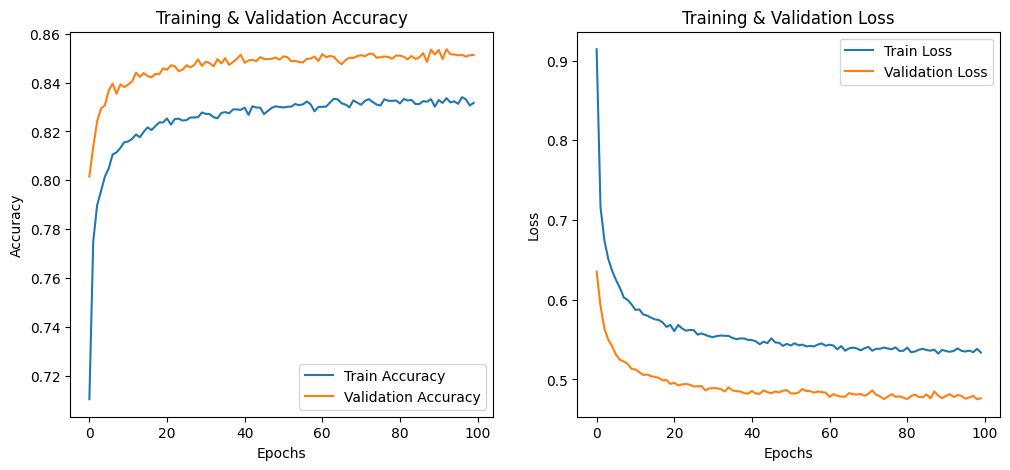

In [51]:
import matplotlib.pyplot as plt

# Plot accuracy & loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")

plt.show()


In [61]:
# Make predictions (returns probabilities)
nn_pred_probs = model.predict(test)

# Convert probabilities to class labels
nn_predictions = np.argmax(nn_pred_probs, axis=1)

# Create a DataFrame with the predictions
# Option 1: If test is already a DataFrame
if isinstance(test, pd.DataFrame):
    test_original = test.copy()
    test_original['Prediction'] = nn_predictions
# Option 2: If test is a numpy array
else:
    test_original = pd.DataFrame(test)
    test_original['Prediction'] = nn_predictions

# Save results to CSV
test_original.to_csv("NN_predictions.csv", index=False)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


In [53]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),      # Start with an explicit Input layer
    Dense(128, activation='relu'),         # First hidden layer (no input_shape needed now)
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [54]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),  # Prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),  # Regularization
    Dense(32, activation='relu'),  # Hidden layer
    Dropout(0.3),  # Regularization
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [55]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [107]:
# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Number of training iterations
    batch_size=32,  # Number of samples per update
    verbose=1,
     #callbacks=[early_stop]
)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8135 - loss: 0.6210 - val_accuracy: 0.8407 - val_loss: 0.5164
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8124 - loss: 0.6239 - val_accuracy: 0.8421 - val_loss: 0.5119
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8159 - loss: 0.6123 - val_accuracy: 0.8450 - val_loss: 0.5124
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8155 - loss: 0.6129 - val_accuracy: 0.8435 - val_loss: 0.5123
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8149 - loss: 0.6179 - val_accuracy: 0.8406 - val_loss: 0.5131
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8136 - loss: 0.6183 - val_accuracy: 0.8456 - val_loss: 0.5080
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8189 - loss: 0.6060 - val_accuracy: 0.8438 - val_loss: 0.5122
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8177 - loss: 0.5983 - 

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8215 - loss: 0.5951 - val_accuracy: 0.8477 - val_loss: 0.5035


In [109]:
# Predict on validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Validation Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_true_classes, y_pred_classes))


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation Accuracy: 0.8477
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1122
           1       0.91      0.97      0.94      1268
           2       0.85      0.92      0.88      1117
           3       0.81      0.85      0.83      1155
           4       0.88      0.57      0.69      1683
           5       0.83      0.85      0.84      1058
           6       0.88      0.93      0.90      1125
           7       0.88      0.92      0.90      1236
           8       0.79      0.84      0.81      1100
           9       0.76      0.81      0.79      1136

    accuracy                           0.85     12000
   macro avg       0.85      0.86      0.85     12000
weighted avg       0.85      0.85      0.84     12000



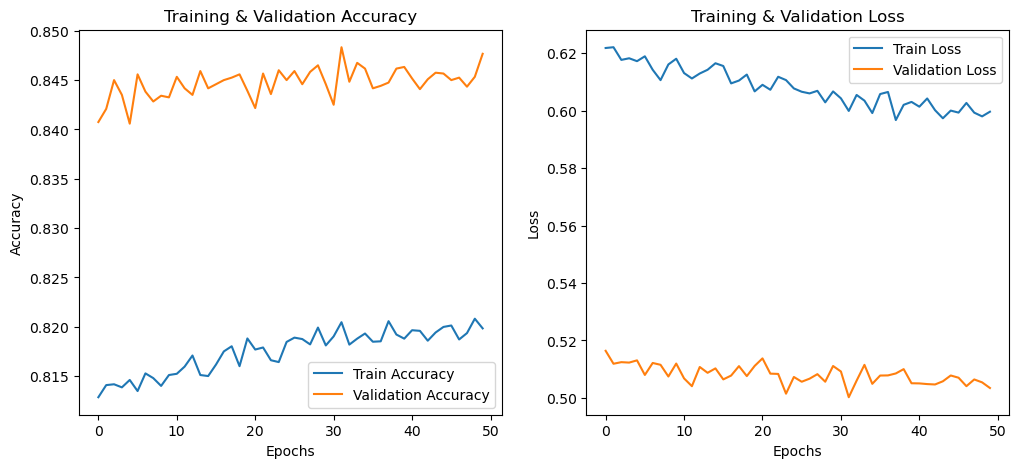

In [110]:
import matplotlib.pyplot as plt

# Plot accuracy & loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")

plt.show()